
# Quickstart


## Creating an isotherm

First, to use pyGAPS in a python or jupyter project, import it.


In [1]:
import pygaps

The backbone of the framework is the PointIsotherm class. This class stores the isotherm
data, isotherm properties such as material and adsorbate with which it was measured, as well
as providing easy interaction with the framework calculations. There are several ways to create
a PointIsotherm object:

- directly from arrays
- from a pandas.DataFrame
- parsing json, csv files, or excel files
- from an sqlite database

For the simplest method, the data can be passed in as arrays of *pressure* and *loading*. 
There are four other required parameters: 
the material name, the material batch or ID, the adsorbate
used and the temperature (in K) at which the data was recorded.

In [2]:
isotherm = pygaps.PointIsotherm(
    pressure=[0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.35, 0.25, 0.15, 0.05],
    loading=[0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.15, 0.05],
    material= 'Carbon',
    material_batch = 'X1',
    adsorbate = 'N2',
    temperature = 77,
)

Unless specified, the loading is read in *mmol/g* and the
pressure is read in *bar*, although these settings can be changed.
See the isotherm creation part of the documentation to learn more.
The isotherm can also have other properties which are passed in at creation. 

Alternatively, the data can be passed in the form of a pandas.DataFrame.
This allows for other complementary data, such as isosteric enthalpy, XRD peak intensity, or other
simultaneous measurements corresponding to each point to be saved.

The DataFrame should have at least two columns: the pressures
at which each point was recorded, and the loadings for each point.
The `loading_key` and `pressure_key` parameters specify which column in the DataFrame
contain the loading and pressure, respectively. The `other_keys` parameter
should be a list of other columns to be saved.

In [3]:
import pandas

data = pandas.DataFrame({
    'pressure': [0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.35, 0.25, 0.15, 0.05],
    'loading': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.15, 0.05],
    'isosteric_enthalpy': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
})

isotherm = pygaps.PointIsotherm(
    isotherm_data=data,
    pressure_key='pressure',
    loading_key='loading',
    other_keys=['isosteric_enthalpy'],
    
    material= 'Carbon',
    material_batch = 'X1',
    adsorbate = 'N2',
    temperature = 77,
    
    pressure_unit='bar',
    pressure_mode='absolute',
    loading_unit='mmol',
    loading_basis='molar',
    adsorbent_unit='g',
    adsorbent_basis='mass',
)

For easier Isotherm retrieval, pyGAPS also comes with a variety of parsers. Here we can use the JSON parser to get an isotherm previously saved on disk:

In [4]:
with open(r'data/carbon_x1_n2.json') as f:
    isotherm = pygaps.PointIsotherm.from_json(f.read())

To see a summary of the isotherm as well as a graph, use the included function:

Material: Takeda 5A
Batch: Test
Adsorbate used: nitrogen
Isotherm temperature: 77.355K
iso_type: Isotherme
Units: 
	Unit for loading: mmol/g
	Unit for pressure: bar
Other properties: 
	is_real: True
	lab: MADIREL
	machine: Triflex
	t_act: 200.0
	user: PI



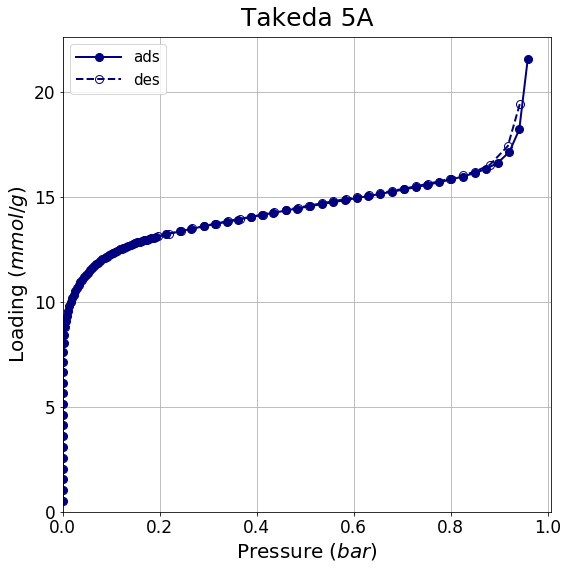

In [5]:
isotherm.print_info()

Now that the PointIsotherm is created, we are ready to do some analysis.

---

## Isotherm analysis with pyGAPS

The framework has several isotherm analysis tools which are commonly used to characterise
porous materials such as:

- BET surface area
- the t-plot method / alpha s method
- mesoporous PSD (pore size distribution) calculations
- microporous PSD calculations
- DFT kernel fitting PSD methods
- isosteric enthalpy of adsorption calculation
- etc.

From a PointIsotherm object, it's easy to start a characterisation. For example, to get
a dictionary with all the parameters of the tplot analysis, use:

In [6]:
result_dict = pygaps.t_plot(isotherm)

import pprint
pprint.pprint(result_dict)

{'results': [{'adsorbed_volume': 0.4493471225837101,
              'area': 99.54915759758686,
              'corr_coef': 0.9996658295304233,
              'intercept': 0.012929909242021878,
              'section': [84, 85, 86, 87, 88, 89, 90],
              'slope': 0.0028645150000192595}],
 't_curve': array([0.14381104, 0.14800322, 0.1525095 , 0.15712503, 0.1617626 ,
       0.16612841, 0.17033488, 0.17458578, 0.17879119, 0.18306956,
       0.18764848, 0.19283516, 0.19881473, 0.2058225 , 0.21395749,
       0.2228623 , 0.23213447, 0.2411563 , 0.24949659, 0.25634201,
       0.2635719 , 0.27002947, 0.27633547, 0.28229453, 0.28784398,
       0.29315681, 0.29819119, 0.30301872, 0.30762151, 0.31210773,
       0.31641915, 0.32068381, 0.32481658, 0.32886821, 0.33277497,
       0.33761078, 0.34138501, 0.34505614, 0.34870159, 0.35228919,
       0.35587619, 0.35917214, 0.36264598, 0.36618179, 0.36956969,
       0.37295932, 0.37630582, 0.37957513, 0.38277985, 0.38608229,
       0.3892784 , 0.3924

If in an interactive environment, such as iPython or Jupyter, it is useful to see the
details of the calculation directly. To do this, increase the verbosity of the method and use matplotlib to display extra information, including graphs:

BET surface area: a = 1111 m2/g
Minimum pressure point chosen is 0.01 and maximum is 0.093
The slope of the BET fit: s = 87.602
The intercept of the BET fit: i = 0.238
The BET constant is: C = 368
Amount for a monolayer: n = 0.01138 mol/g


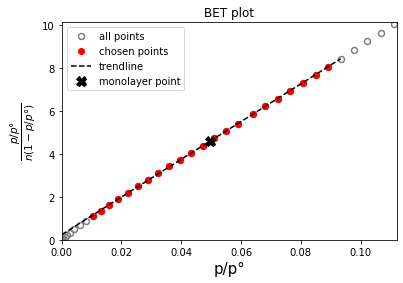

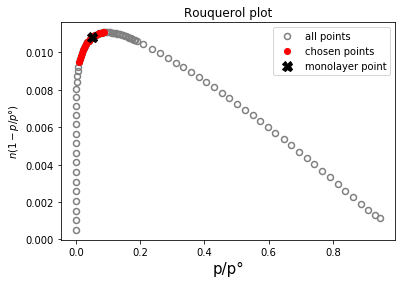

In [7]:
import matplotlib.pyplot as plt

result_dict = pygaps.area_BET(isotherm, verbose=True)

plt.show()

Depending on the method, different parameters can be passed to change the way the
calculations are performed. For example, if a mesoporous size distribution is
desired using the Dollimore-Heal method on the desorption branch of the isotherm,
assuming the pores are cylindrical, one side open and that adsorbate thickness can
be described by a Halsey-type thickness curve, the code will look like:

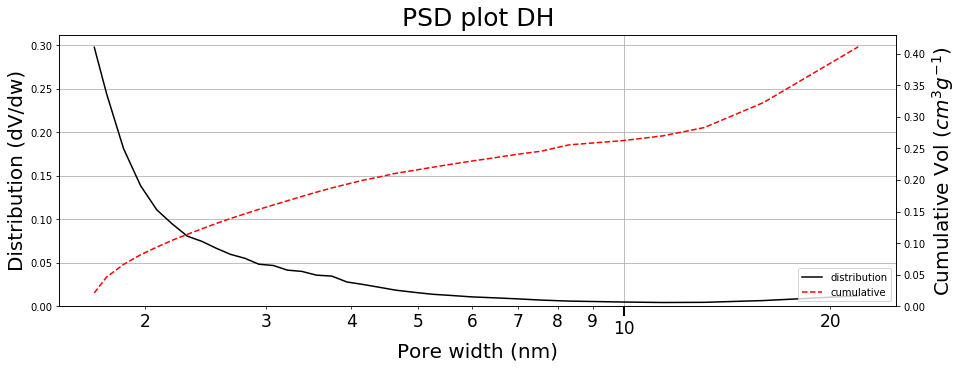

In [8]:
result_dict = pygaps.psd_mesoporous(
    isotherm,
    psd_model='DH',
    branch='des',
    pore_geometry='cylinder',
    thickness_model='Halsey',
    verbose=True,
)
plt.show()

For more information on how to use each method, check the detailed manual.

---

## Isotherm modelling with pyGAPS

The framework comes with functionality to model point isotherm data with common
isotherm models such as Henry, Langmuir, Temkin, Virial etc.

The modelling is done through the ModelIsotherm class. The class is similar to the
PointIsotherm class, and shares the same ability to store parameters. However, instead of
data, it stores model coefficients for the model it's describing.

To create a ModelIsotherm, the same parameters dictionary / pandas DataFrame procedure can
be used. But, assuming we've already created a PointIsotherm object, we can use it to instantiate
the ModelIsotherm instead. To do this we use the class method:

Attempting to model using Langmuir
Model Langmuir success, RMSE is 2.120


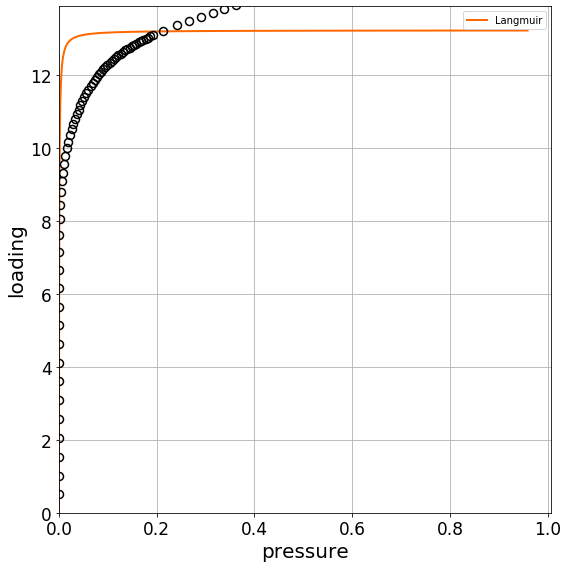

In [9]:
model_iso = pygaps.ModelIsotherm.from_pointisotherm(isotherm, model='Langmuir', verbose=True)

A minimisation procedure will then attempt to fit the model's parameters to the isotherm points.
If successful, the ModelIsotherm is returned.

In case the model which best fits the data is desired, the class method can also be passed a
bool which allows the ModelIsotherm to select the best fitting model. This means that all
models available will be calculated and the best one will be returned and will of course
take more processing power.

Attempting to model using Henry
Model Henry success, RMSE is 7.419
Attempting to model using Langmuir
Model Langmuir success, RMSE is 2.120
Attempting to model using DSLangmuir
Model DSLangmuir success, RMSE is 0.846
Attempting to model using DR
Model DR success, RMSE is 1.315
Attempting to model using Freundlich
Model Freundlich success, RMSE is 0.738
Attempting to model using Quadratic
Model Quadratic success, RMSE is 0.848
Attempting to model using BET
Model BET success, RMSE is 12.237
Attempting to model using TemkinApprox
Model TemkinApprox success, RMSE is 2.046
Attempting to model using Toth
Model Toth success, RMSE is 0.757
Attempting to model using Jensen-Seaton
Model Jensen-Seaton success, RMSE is 0.533
Best model fit is Jensen-Seaton


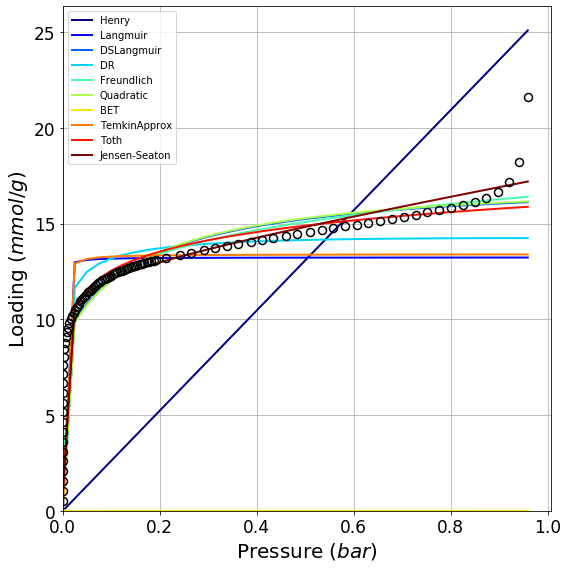

In [10]:
model_iso = pygaps.ModelIsotherm.from_pointisotherm(isotherm, guess_model='all', verbose=True)

More advanced settings can also be specified, such as the optimisation model to be used in the
optimisation routine or the initial parameter guess.

To print the model parameters use the internal print function. The calculation of loading
made with the model can be accessed by using the loading function.

Material: Takeda 5A
Batch: Test
Adsorbate used: nitrogen
Isotherm temperature: 77.355K
iso_type: Isotherme
Units: 
	Unit for loading: mmol/g
	Unit for pressure: bar
Other properties: 
	branch: ads
	plot_fit: False
	is_real: False
	lab: MADIREL
	machine: Triflex
	t_act: 200.0
	user: PI
Jensen-Seaton isotherm model.
RMSE = 0.5325
Model parameters:
	K = 544353796.820126
	a = 16.729588
	b = 0.335824
	c = 0.180727
Model applicable range:
	Pressure range: 0.00 - 0.96
	Loading range: 0.51 - 21.59



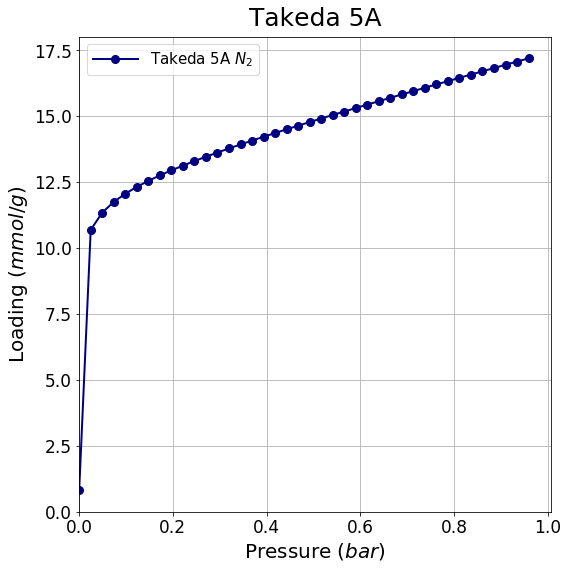

In [11]:
 # Prints isotherm parameters and model info
model_iso.print_info()

In [12]:
# Returns the loading at 1 bar calculated with the model
model_iso.loading_at(1.0)

17.402319841207497

In [13]:
# Returns the loading in the range 0-1 bar calculated with the model
pressure = [0.1,0.5,1]
model_iso.loading_at(pressure)

array([12.08223156, 14.82544349, 17.40231984])

## Graphing

pyGAPS makes graphing both PointIsotherm and ModelIsotherm objects easy to facilitate
visual observations, inclusion in publications and consistency. Plotting an isotherm is
as simple as:

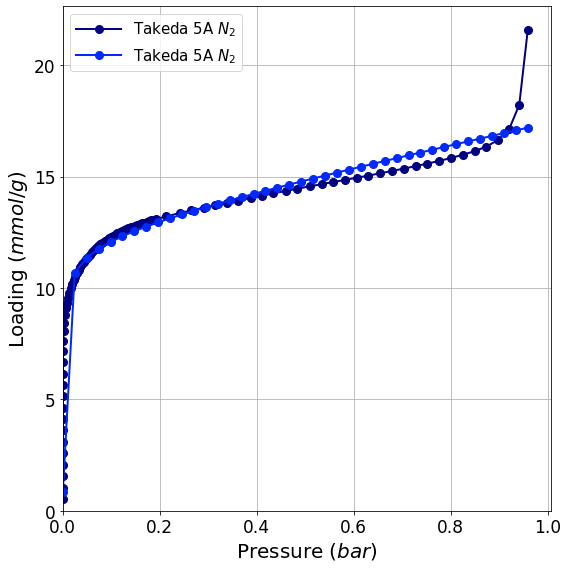

In [14]:
import matplotlib.pyplot as plt

pygaps.plot_iso([isotherm, model_iso], branch='ads')

plt.show()

Many settings can be specified to change the look and feel of the graphs. More settings
can be found in the manual.